# PROPERTIES OF FINANCIAL TIME SERIES AND VOLATILITY MODELING


In [1]:
# Note: I evaluate my p-values at the 5% level.

# import baseline computational and plotting packages needed for the assignment
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import statsmodels.api as sm  # Import statsmodels to use correlogram (ACF) plotting
from statsmodels.graphics.tsaplots import plot_acf  # Import ACF plotting function
from statsmodels.stats.diagnostic import acorr_ljungbox
# import Jarque Bera test for normality of the series and get skewness and kurtosis for the series
from statsmodels.stats.stattools import jarque_bera
# import necessary packages; I'll be using the arch package's arch_model which includes ML estimation
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model
from scipy.stats import skew, kurtosis


# Exercise 1: US/EURO Bonds and Stocks, Correlograms and Jarque Bera Tests

In [2]:
# import data from ECON_5811_01_PS_01_data.xlsx and read the first row
df = pd.read_excel("/Users/camerontaheri/python/financial_econometrics_ps/Data/ECON_5811_01_PS_01_data.xlsx", engine="openpyxl")
df.head()

,_date_,rjpmge,rjpmuk,rjpmus,rmscige,rmsciuk,rmscius,rpound,ryen,reuro
0,1990-01-01,0.000887,0.000000,0.000000,0.000000,0.000000,-0.000003,0.000000,0.000000,0.000000
1,1990-01-02,-0.022811,-0.003479,-0.000694,-0.003498,0.004947,0.017699,0.001241,0.019014,0.009523
2,1990-01-03,-0.007501,-0.001934,-0.002085,0.032893,0.012267,-0.002167,0.001553,-0.006573,0.006593
3,1990-01-04,0.020324,0.010526,0.000436,0.004192,0.008019,-0.008148,-0.013278,-0.015883,-0.020660
4,1990-01-05,-0.002006,0.003306,-0.000628,-0.007470,0.001478,-0.009947,-0.004591,0.007189,-0.001214


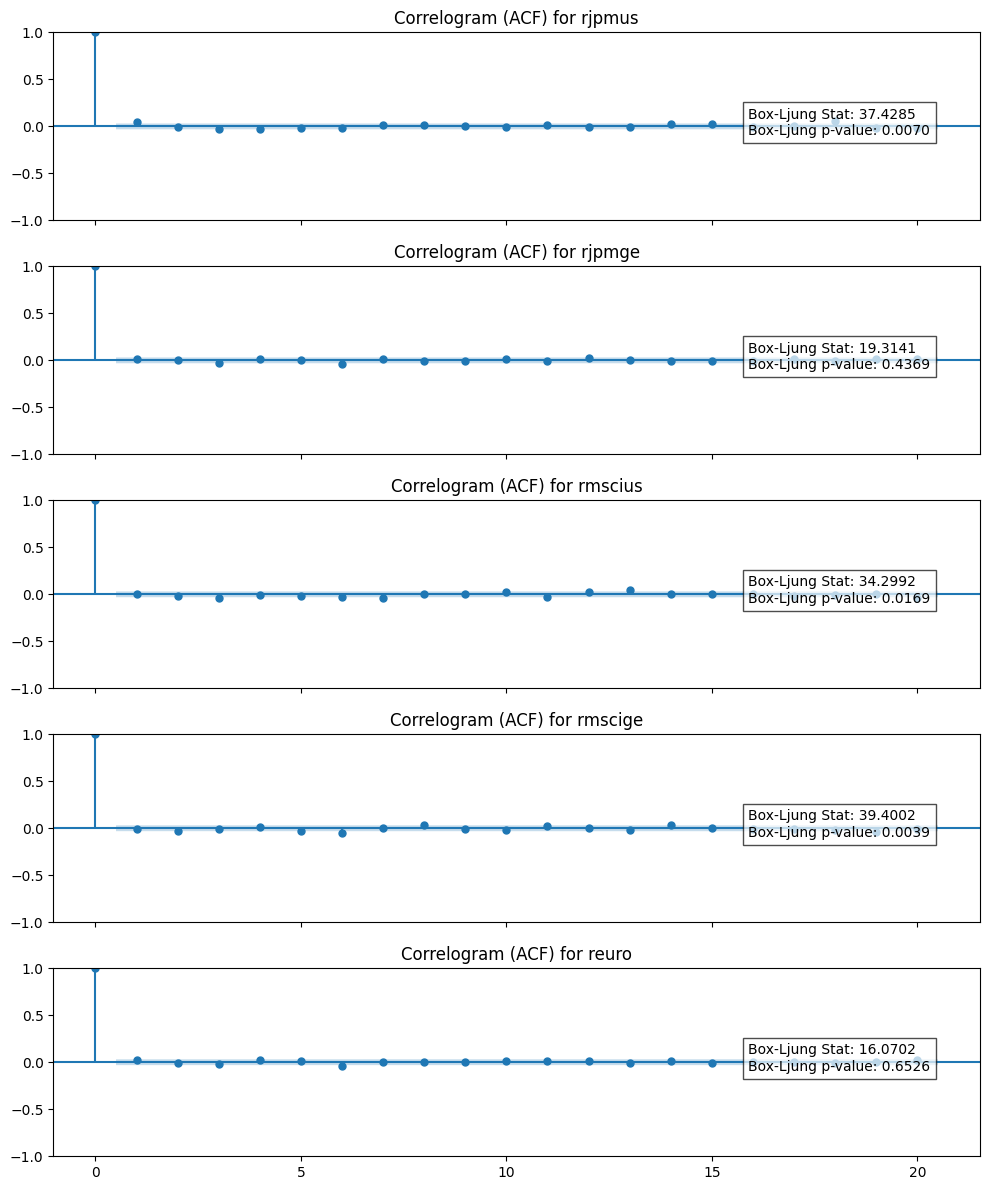

In [ ]:
import statsmodels.api as sm  # Import statsmodels to use correlogram (ACF) plotting
from statsmodels.graphics.tsaplots import plot_acf  # Import ACF plotting function
from statsmodels.stats.diagnostic import acorr_ljungbox

# Select the US and EURO series for bond and stock indexes as well as the EURO exchange rate returns
US_EURO_series = df[['rjpmus', 'rjpmge', 'rmscius', 'rmscige', 'reuro']]

# Create subplots for each time series
fig, axes = plt.subplots(len(US_EURO_series.columns), 1, figsize=(10, 12), sharex=True)

for i, col in enumerate(US_EURO_series.columns):
    series = US_EURO_series[col].dropna()

    # Plot the correlogram (ACF)
    sm.graphics.tsa.plot_acf(series, lags=20, ax=axes[i])
    axes[i].set_title(f"Correlogram (ACF) for {col}")

    # Perform Box-Ljung test
    lb_result = acorr_ljungbox(series, lags=20)  # Test up to 20 lags
    lb_stat = lb_result['lb_stat'][19]  # Get the Box-Ljung statistic for the 20th lag
    lb_pval = lb_result['lb_pvalue'][19]  # Get the p-value for the 20th lag
    
    # Add test result to the plot
    stats_text = f"Box-Ljung Stat: {lb_stat:.4f}\nBox-Ljung p-value: {lb_pval:.4f}"
    axes[i].text(0.75, 0.6, stats_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

### The correlograms above indicate low serial correlation for each series. When we run a Box-Ljung test (imported from statsmodels) for each of them we see that the EURO (reuro) and European bond index (rjpmge) have high p-values so we fail to reject the null hypothesis of zero correlation for those returns, so there is likely to be zero correlation. US bond index (rjpmus), US stock index (rmscius), and European stock index (rmscige) all have low p-values so we reject the null indicating serial correlation for those returns.

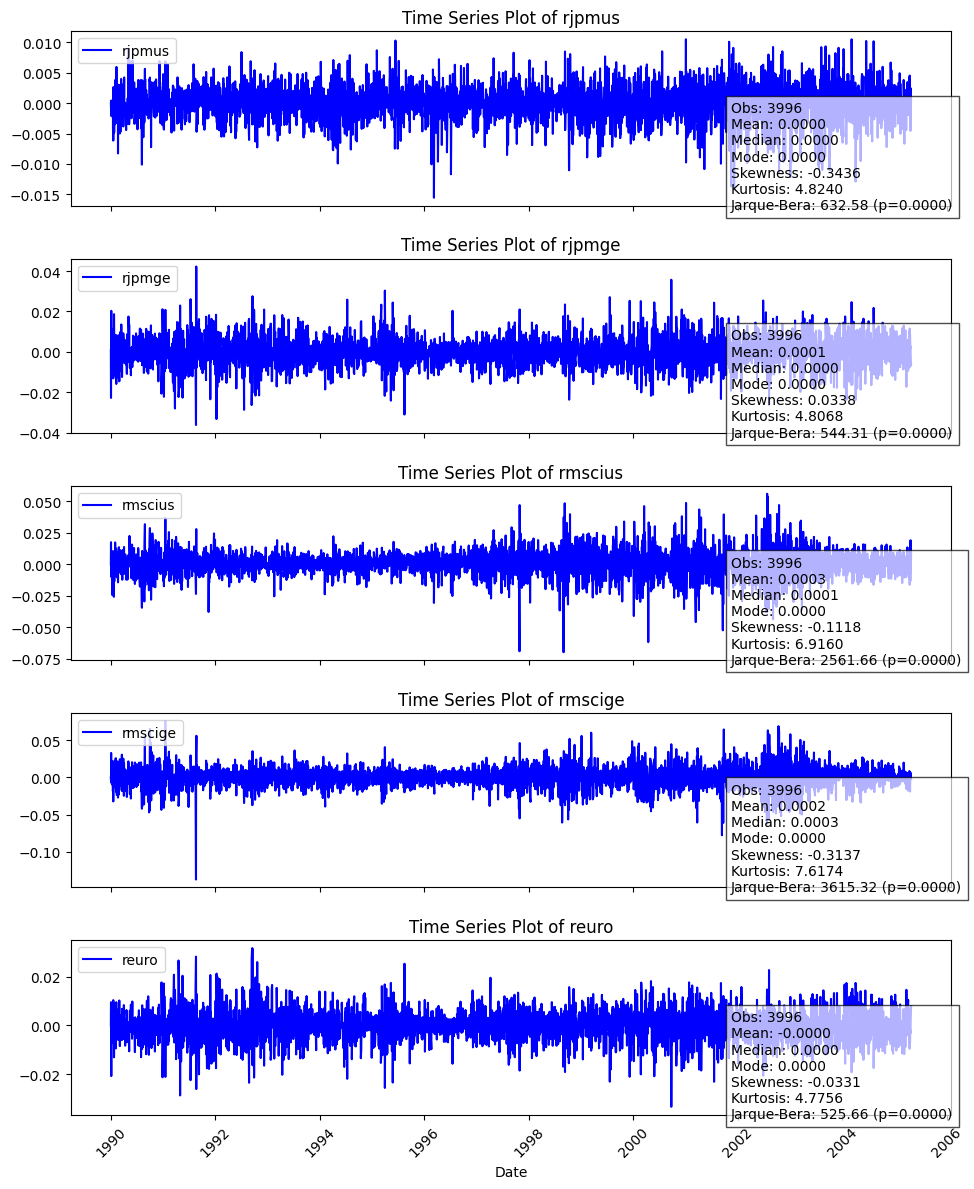

In [4]:
# import Jarque Bera test for normality of the series and get skewness and kurtosis for the series
from statsmodels.stats.stattools import jarque_bera

# Select the US and EURO series and set '_date_' as the index
df['_date_'] = pd.to_datetime(df['_date_'])  # Ensure the Date column is in datetime format
df.set_index('_date_', inplace=True)  # Set Date as the index

# Select the US and EURO series
US_EURO_series = df[['rjpmus', 'rjpmge', 'rmscius', 'rmscige', 'reuro']]

# Create subplots for each time series
fig, axes = plt.subplots(len(US_EURO_series.columns), 1, figsize=(10, 12), sharex=True)

for i, col in enumerate(US_EURO_series.columns):
    series = US_EURO_series[col].dropna()  # This is where 'series' gets its value from
    
    # Compute statistics
    obs = len(series)
    mean = series.mean()
    median = series.median()
    mode_val = series.mode().iloc[0] if not series.mode().empty else np.nan  # Fixed mode calculation
    jb_stat, jb_pval, skewness, kurt = jarque_bera(series)  # Get skewness and kurtosis from JB test
    
    # Plot time series
    axes[i].plot(series, label=col, color='b')
    axes[i].set_title(f"Time Series Plot of {col}")
    axes[i].legend(loc="upper left")
    
    # Create stats text box
    stats_text = (
        f"Obs: {obs}\n"
        f"Mean: {mean:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Mode: {mode_val:.4f}\n"
        f"Skewness: {skewness:.4f}\n"
        f"Kurtosis: {kurt:.4f}\n"
        f"Jarque-Bera: {jb_stat:.2f} (p={jb_pval:.4f})"
    )
    
    # Add text box to the plot
    axes[i].text(0.75, 0.6, stats_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Format x-axis to display dates properly
plt.xlabel("Date")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


### We see each series is non-Gaussian from the Jarque-Bera Test statistic and a near-zero p-value, so we reject the null of a normal distribution. This is also evident by non-zero values for the skewness of each series as well as a kurtosis above 3 indicating leptokurtosis.

### Now, we will square the returns and repeat the correlograms with Box-Ljung tests and Jarque-Bera tests for each one too.

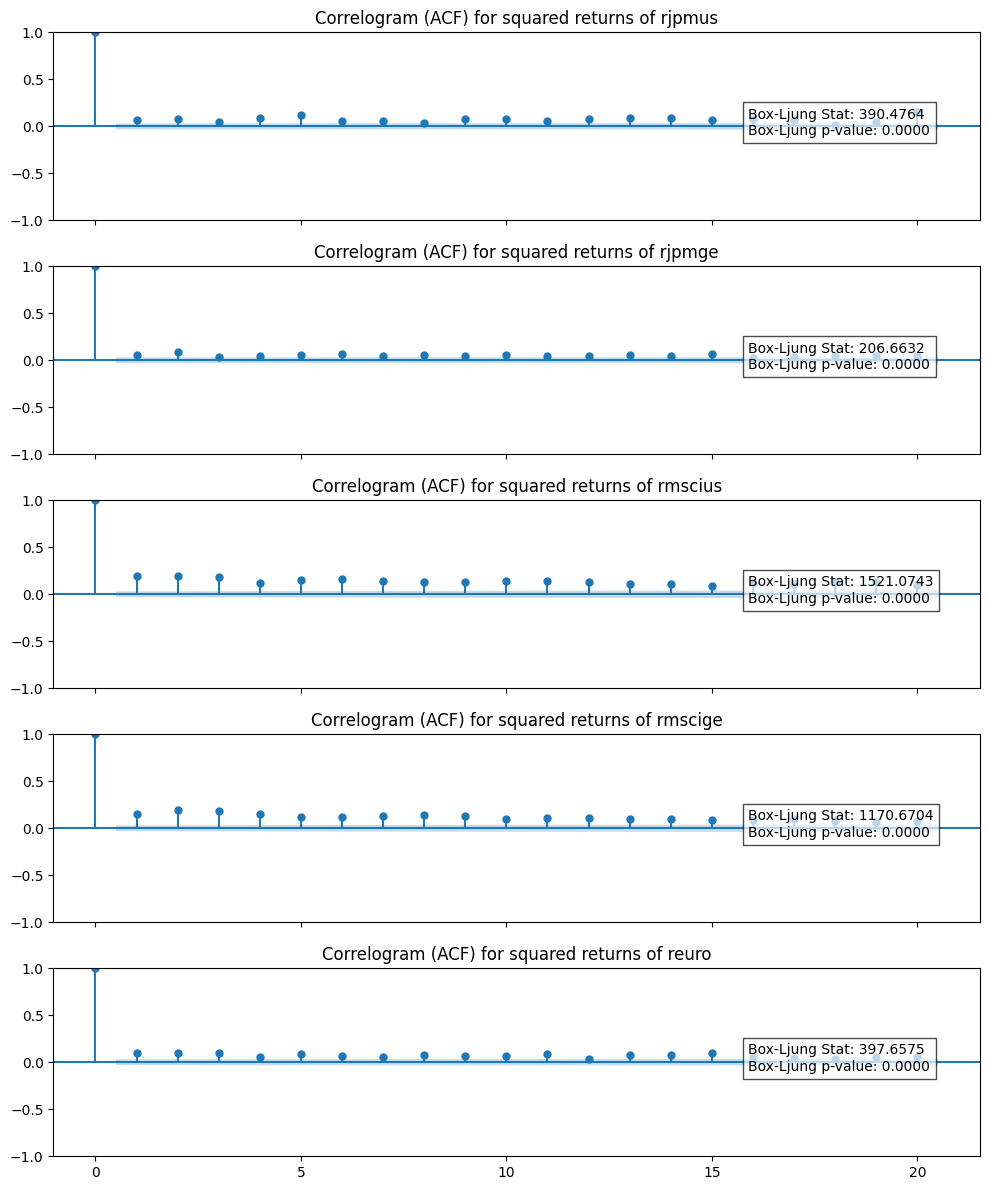

In [5]:
# Create new subplots for each time series
fig, axes = plt.subplots(len(US_EURO_series.columns), 1, figsize=(10, 12), sharex=True)

for i, col in enumerate(US_EURO_series.columns):
    series = US_EURO_series[col].dropna()

    # Compute the squared returns for the series
    squared_series = series**2

    # Plot the correlogram (ACF)
    sm.graphics.tsa.plot_acf(squared_series, lags=20, ax=axes[i])
    axes[i].set_title(f"Correlogram (ACF) for squared returns of {col}")

    # Perform Box-Ljung test
    lb_result = acorr_ljungbox(squared_series, lags=20)  # Test up to 20 lags
    lb_stat = lb_result['lb_stat'][19]  # Get the Box-Ljung statistic for the 20th lag
    lb_pval = lb_result['lb_pvalue'][19]  # Get the p-value for the 20th lag
    
    # Add test result to the plot
    stats_text = f"Box-Ljung Stat: {lb_stat:.4f}\nBox-Ljung p-value: {lb_pval:.4f}"
    axes[i].text(0.75, 0.6, stats_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

### Squared returns show statistically significant zero correlation for all series, which differs from the non-squared values of the series shown above. This suggests volatility (measured by variance) is persistent over time.

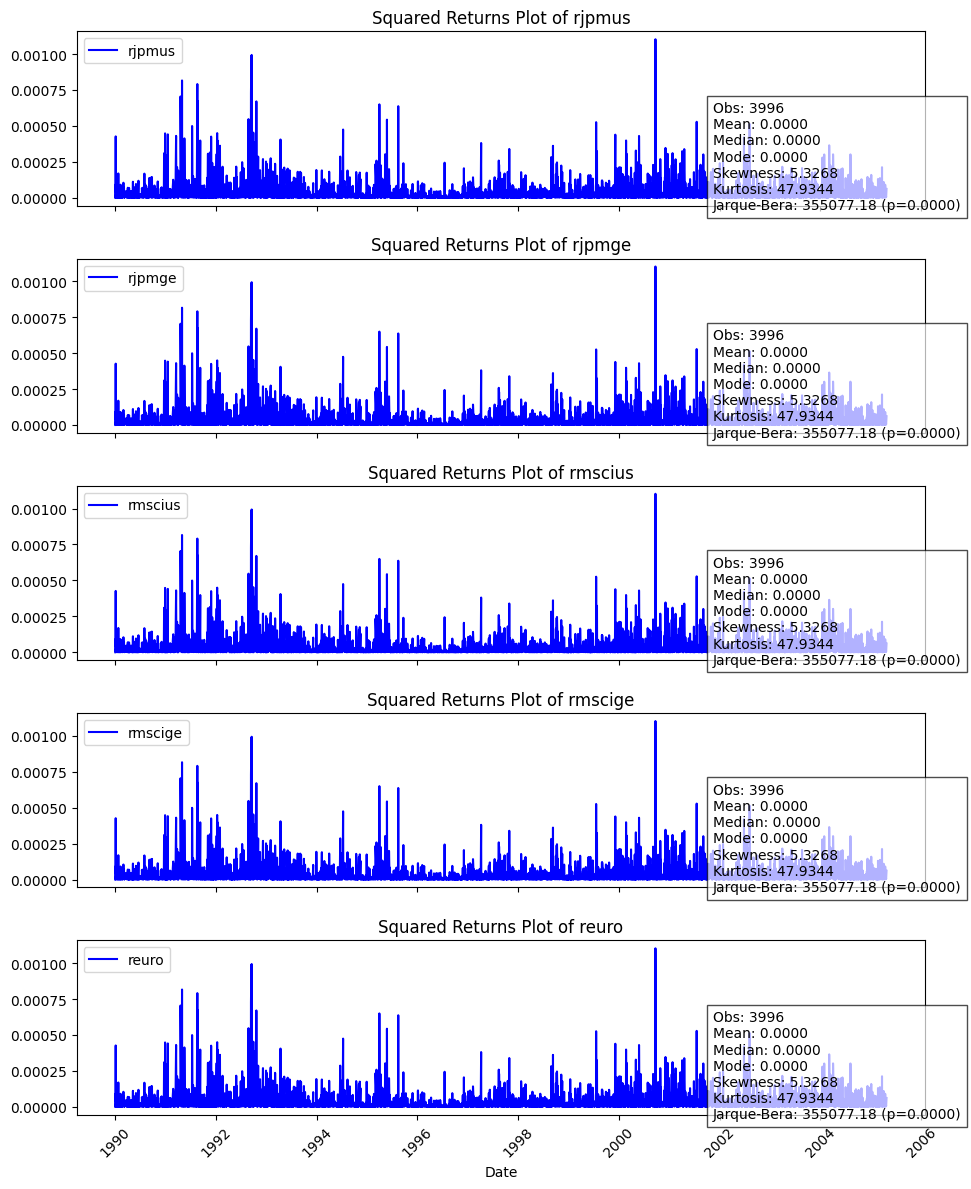

In [6]:
# import Jarque Bera test for normality of the series and get skewness and kurtosis for the series
from statsmodels.stats.stattools import jarque_bera

# Select the US and EURO series
US_EURO_series = df[['rjpmus', 'rjpmge', 'rmscius', 'rmscige', 'reuro']]

# Create subplots for each time series
fig, axes = plt.subplots(len(US_EURO_series.columns), 1, figsize=(10, 12), sharex=True)

for i, col in enumerate(US_EURO_series.columns):
    series = US_EURO_series[col].dropna()  # This is where 'series' gets its value from

    # Compute statistics
    obs = len(squared_series)
    mean = squared_series.mean()
    median = squared_series.median()
    mode_val = squared_series.mode().iloc[0] if not squared_series.mode().empty else np.nan  # Fixed mode calculation
    jb_stat, jb_pval, skewness, kurt = jarque_bera(squared_series)  # Get skewness and kurtosis from JB test
    
    # Plot time series
    axes[i].plot(squared_series, label=col, color='b')
    axes[i].set_title(f"Squared Returns Plot of {col}")
    axes[i].legend(loc="upper left")
    
    # Create stats text box
    stats_text = (
        f"Obs: {obs}\n"
        f"Mean: {mean:.4f}\n"
        f"Median: {median:.4f}\n"
        f"Mode: {mode_val:.4f}\n"
        f"Skewness: {skewness:.4f}\n"
        f"Kurtosis: {kurt:.4f}\n"
        f"Jarque-Bera: {jb_stat:.2f} (p={jb_pval:.4f})"
    )
    
    # Add text box to the plot
    axes[i].text(0.75, 0.6, stats_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Format x-axis to display dates properly
plt.xlabel("Date")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


### Squared returns are non-Gaussian given the Jarque-Bera test statistics and low p-values.

# Exercise 2: Tests for IID (Siegel-Castellan and Box-Ljung)

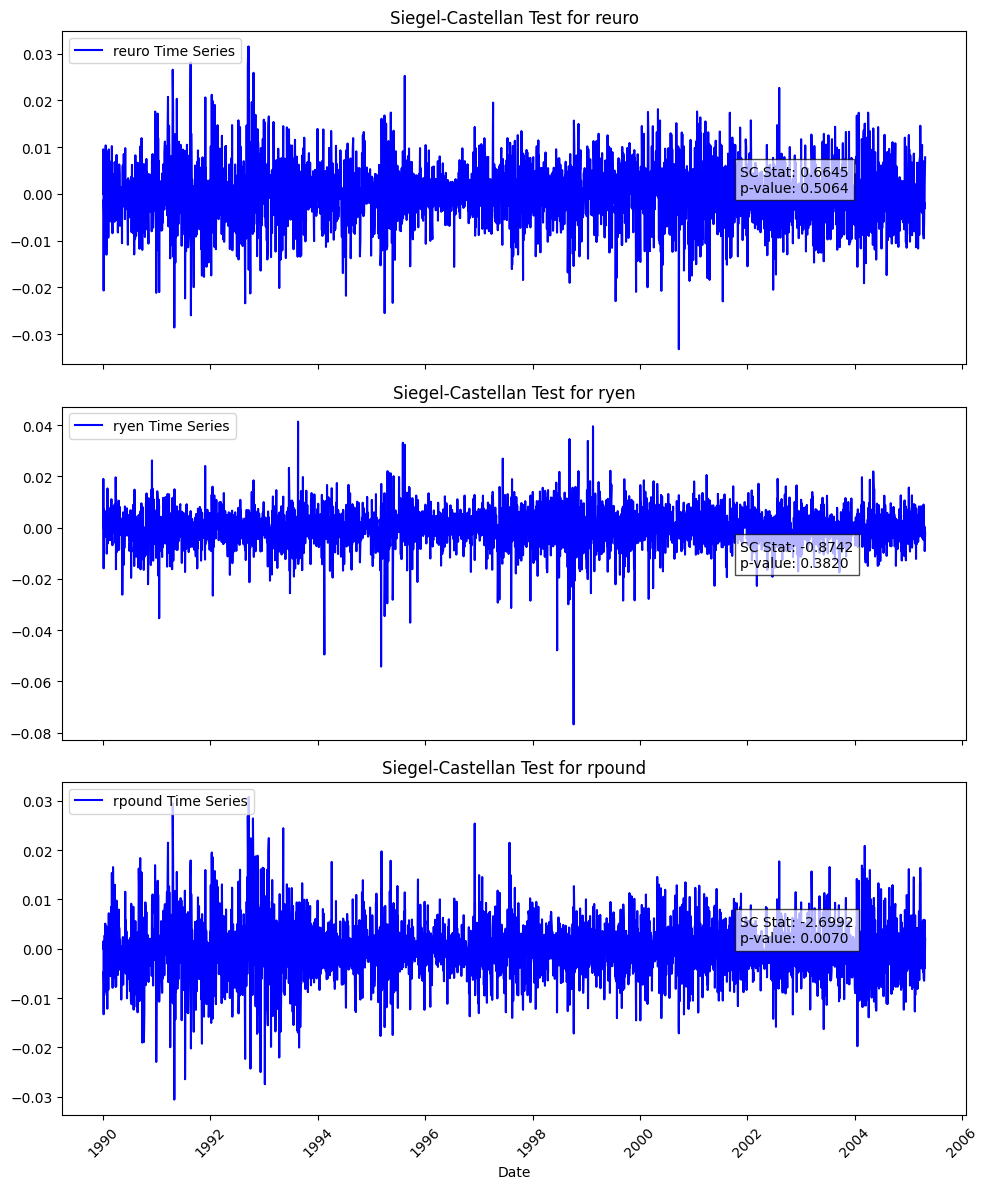

In [7]:
# grab SC test from siegelcastellanfunc file
# description of how I made the function is in the siegelcastellanfunc file
from scipy.optimize import minimize
from statsmodels.tsa.ar_model import AutoReg
from scipy.stats import norm

# Siegel-Castellan test to count strictly above and strictly below the threshold, excluding equal values
def sc_test(series):
    # Step 1: Define threshold (tau) as the median of the series
    tau = series.median()

    # Step 2: Count the number of observations strictly below and strictly above the threshold
    T0 = (series < tau).sum()  # Count of observations below tau
    T1 = (series > tau).sum()  # Count of observations above tau
    
    # T is the sum of T0 and T1 (only strictly below and above values)
    T = T0 + T1  # Total number of observations strictly below or above tau
    numruns = 1  # Initialize the run count

    # Step 3: Count the number of runs (consecutive values above or below threshold)
    for i in range(1, len(series)):
        # Ensure strictly above and below (no equal to tau)
        if (series.iloc[i] < tau and series.iloc[i-1] > tau) or (series.iloc[i] > tau and series.iloc[i-1] < tau):
            numruns += 1

    # Check that T0 + T1 equals T
    if T0 + T1 != T:
        raise ValueError(f"Mismatch in counts: T0 + T1 = {T0 + T1}, but T = {T}. Please check the data.")

    # Step 4: Calculate the Siegel-Castellan test statistic
    sc_stat = (numruns - (1 + 2 * ((T0 * T1) / T))) / np.sqrt((2 * T0 * T1 * (2 * T0 * T1 - T)) / ((T**2) * (T - 1)))

    # Step 5: Calculate p-value assuming normal distribution (mean=0, std=1 under the null hypothesis)
    p_value = 2 * (1 - norm.cdf(np.abs(sc_stat)))

    return sc_stat, p_value

# grab norm for p-value calculation
from scipy.stats import norm

# Select the relevant columns to test
currency_series = ['reuro', 'ryen', 'rpound']

# Create a figure for displaying results
fig, axes = plt.subplots(len(currency_series), 1, figsize=(10, 12), sharex=True)

# Loop over each time series for Siegel-Castellan test
for i, col in enumerate(currency_series):
    series = df[col].dropna()  # Get the non-null series

    # Perform Siegel-Castellan test
    sc_stat, p_value = sc_test(series)
    
    # Plot the time series for each column
    axes[i].plot(series, label=f'{col} Time Series', color='b')
    axes[i].set_title(f"Siegel-Castellan Test for {col}")
    axes[i].legend(loc="upper left")
    
    # Add the test result to the plot
    stats_text = f"SC Stat: {sc_stat:.4f}\np-value: {p_value:.4f}"
    axes[i].text(0.75, 0.6, stats_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

# Format the x-axis and labels
plt.xlabel("Date")
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()
plt.show()


### My Siegel-Castellan (SC) test for the three series (EURO, YEN, and GBP) are replicated using a function that manually calculates the SC statistic. Note that I purposely did not include threshold values to avoid placing more weight on the below_threshold or above_threshold values. EURO and YEN have high p-values so we fail to reject the null, which suggests those series are distributed IID, however, the GBP has a low p-value so we reject the null, indicating a non-IID series.

### Below, I run a Box-Ljung Test for the three series to test whether there is significant serial correlation. If there is serial correlation, then it suggests dependence. I use this to help reinforce the above observations.

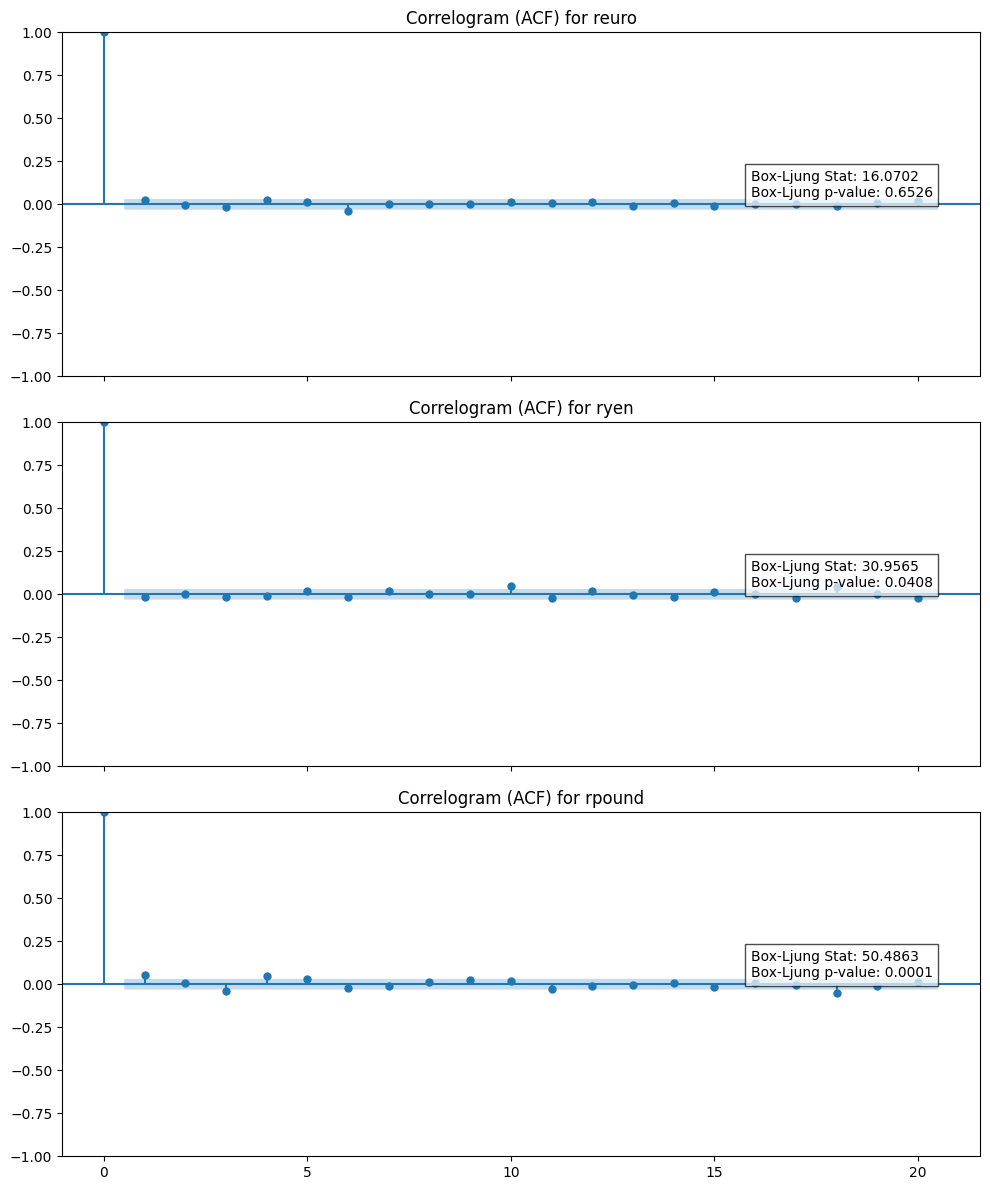

In [8]:
# Turn currency_series into a DataFrame
currency_series = df[['reuro', 'ryen', 'rpound']]

# Create subplots for each time series
fig, axes = plt.subplots(len(currency_series.columns), 1, figsize=(10, 12), sharex=True)

for i, col in enumerate(currency_series.columns):
    series = currency_series[col].dropna()

    # Plot the correlogram (ACF)
    sm.graphics.tsa.plot_acf(series, lags=20, ax=axes[i])
    axes[i].set_title(f"Correlogram (ACF) for {col}")

    # Perform Box-Ljung test
    lb_result = acorr_ljungbox(series, lags=20)  # Test up to 20 lags
    lb_stat = lb_result['lb_stat'][19]  # Get the Box-Ljung statistic for the 20th lag
    lb_pval = lb_result['lb_pvalue'][19]  # Get the p-value for the 20th lag
    
    # Add test result to the plot
    stats_text = f"Box-Ljung Stat: {lb_stat:.4f}\nBox-Ljung p-value: {lb_pval:.4f}"
    axes[i].text(0.75, 0.6, stats_text, transform=axes[i].transAxes, fontsize=10,
                 verticalalignment='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))

plt.tight_layout()
plt.show()

### Interestingly, we reject the null for YEN which differs from the SC test above. In rejecting the null of zero correlation, this test suggests that YEN's returns exhibit serial correlation and observations are dependent upon each other (not IDD). GBP's returns also seem to exhibit serial correlation given the low p-value, supporting the hypothesis that its returns are also not IDD and confirming the results of the SC test above. EURO has a high p-value so we fail to reject the null, which, together with the SC test above, indicates no serial correlation and an IID distribution.

# Exercise 3: ARCH(1) Model

In [9]:
# import necessary packages; I'll be using the arch package's arch_model which includes ML estimation
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model

# Define and rescale data series (I was getting a warning about the scaling of the series previously)
currency_series_scaled = df[['reuro', 'ryen', 'rpound']] * 100

# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit ARCH(1) model using those residuals
    model = arch_model(residuals, vol='ARCH', p=1)  # ARCH(1) model
    result = model.fit(disp=0) # suppressing the output of iterations; to see them, remove disp=0 --> model.fit() 

    # Print results
    print(f"Results for {col}:")
    print(result.summary())

Results for reuro:
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -3717.95
Distribution:                  Normal   AIC:                           7441.90
Method:            Maximum Likelihood   BIC:                           7460.78
                                        No. Observations:                 3995
Date:                Thu, Apr 10 2025   Df Residuals:                     3994
Time:                        17:22:23   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -3.8079e-03  9.643e-03

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


### ARCH effects are captured by ${\alpha_1}$ which is statistically significant (very low p-values) across all three of the currencies that I have modeled above. This suggests past shocks (squared residuals of prior period) have an effect on the conditional variance (${h_t}$) of the returns.

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


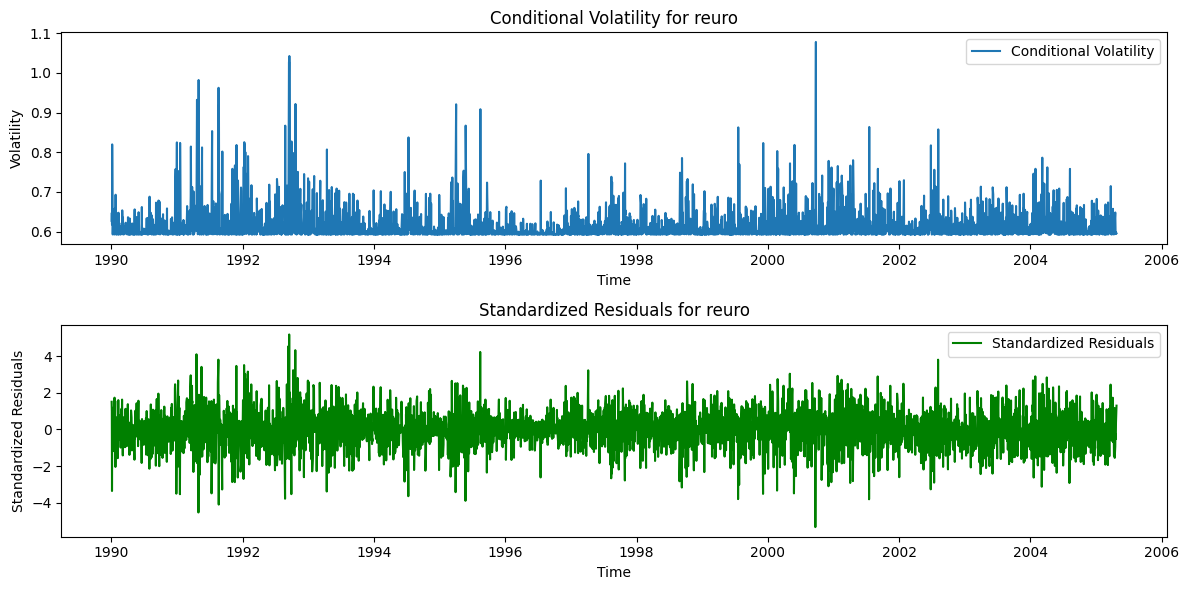

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


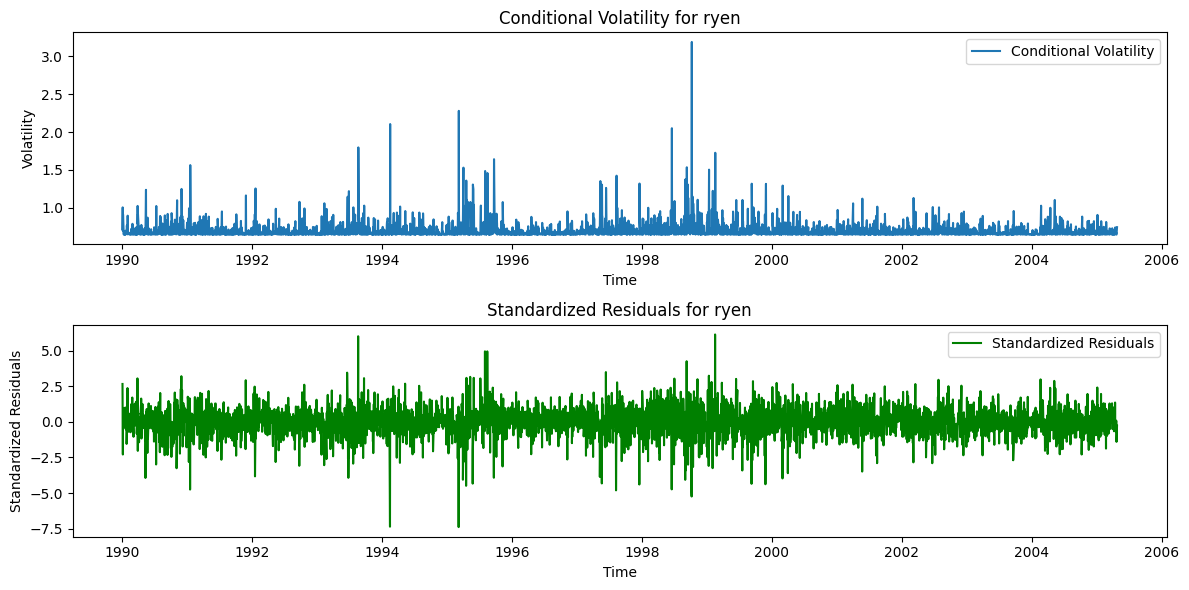

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


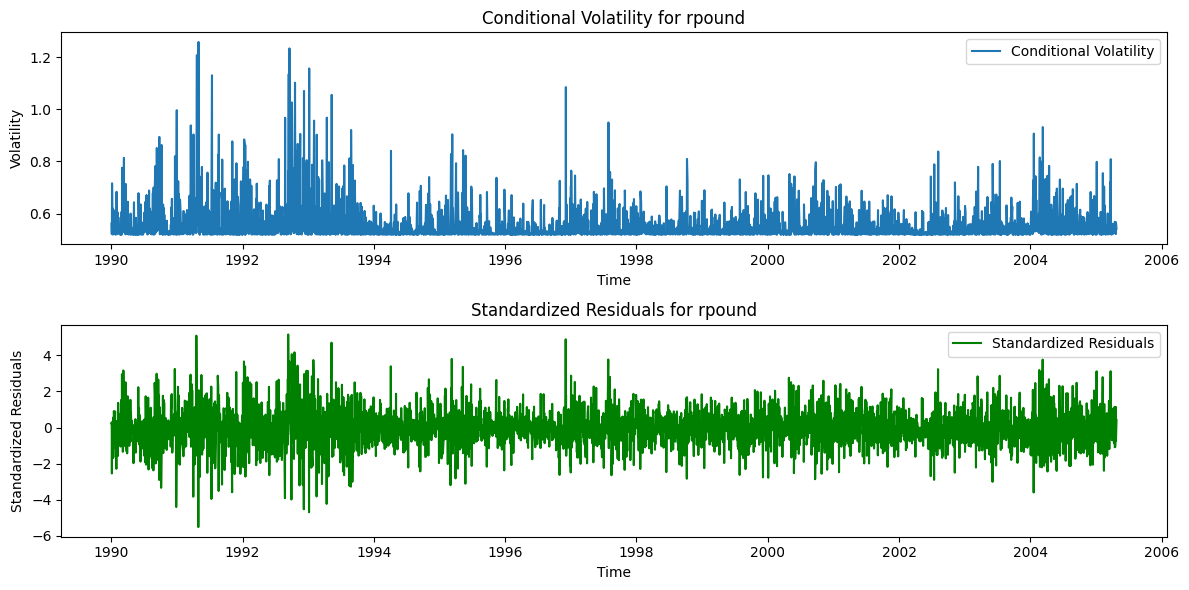

In [10]:
# import necessary packages; I'll be using the arch package's arch_model which includes ML estimation
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model

# Define and rescale data series (I was getting a warning about the scaling of the series previously)
currency_series_scaled = df[['reuro', 'ryen', 'rpound']] * 100

# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit ARCH(1) model using those residuals
    model = arch_model(residuals, vol='ARCH', p=1)  # ARCH(1) model
    result = model.fit(disp=0)
    
    # Calculate and plot the conditional volatility and standardized residuals for the above ARCH(1) model to visualize the volatility
    conditional_volatility = result.conditional_volatility
    standardized_residuals = residuals / conditional_volatility

    # Conditional volatility graph
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(conditional_volatility, label="Conditional Volatility")
    plt.title(f"Conditional Volatility for {col}")
    plt.xlabel("Time")
    plt.ylabel("Volatility")
    plt.legend()

    # Standardized residuals graph
    plt.subplot(2, 1, 2)
    plt.plot(standardized_residuals, label="Standardized Residuals", color='green')
    plt.title(f"Standardized Residuals for {col}")
    plt.xlabel("Time")
    plt.ylabel("Standardized Residuals")
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

### Conditional volatility exhibits volatility clustering with high variance clustered together and followed by periods of low variance clustered together. Standardized residuals seem to exhibit white noise as it oscillates randomly about zero.

# Exercise 4: Analytical Expression for Skewness and Kurtosis of ${u_t}$

### Skewness of ${u_t}$:  $\widehat{SK} = \frac{\scriptstyle{1/T} \sum_{t=1}^{T}({u_t} - \bar{u})^3}{({\widehat{\sigma}}^2)^{\scriptscriptstyle{3/2}}}$
### Kurtosis of ${u_t}$:  $\widehat{k} = \frac{\scriptstyle{1/T} \sum_{t=1}^{T}({u_t} - \bar{u})^4}{({\widehat{\sigma}}^2)^{\scriptscriptstyle{2}}}$

In [11]:
from scipy.stats import skew, kurtosis

# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit ARCH(1) model using those residuals
    model = arch_model(residuals, vol='ARCH', p=1)  # ARCH(1) model
    result = model.fit(disp=0)
    
    # Calculate and plot the conditional volatility and standardized residuals for the above ARCH(1) model to visualize the volatility
    conditional_volatility = result.conditional_volatility
    standardized_residuals = residuals / conditional_volatility

    # Calculate skewness and kurtosis of residuals
    residual_skewness = skew(residuals)
    residual_kurtosis = kurtosis(residuals)

    print(f"Skewness of residuals for {col}: {residual_skewness:.4f}")
    print(f"Kurtosis of residuals for {col}: {residual_kurtosis:.4f}")

Skewness of residuals for reuro: -0.0405
Kurtosis of residuals for reuro: 1.7464
Skewness of residuals for ryen: -0.7611
Kurtosis of residuals for ryen: 7.8915
Skewness of residuals for rpound: 0.1333
Kurtosis of residuals for rpound: 2.5396


/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


### As expected, all of the currencies exhibit non-zero skewness and a kurtosis not equal to 3. YEN seems to be the only leptokurtic series (large tails with a sharp peak) while the others are platykurtic (large tails with a flatter peak). We would expect a kurtosis of 3 if the distribution of ${u_t}$ were normal, but the above results suggest non-normality.

# Exercise 5: GARCH(1,1) Model

In [12]:
# import necessary packages; I'll be using the arch package's arch_model which includes ML estimation
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model

# Define and rescale data series (I was getting a warning about the scaling of the series previously)
currency_series_scaled = df[['reuro', 'ryen', 'rpound']] * 100

# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit GARCH(1,1) model using those residuals
    model = arch_model(residuals, vol='Garch', p=1, q=1)  # GARCH(1,1) model
    result = model.fit(disp=0) # suppressing the output of iterations; to see them, remove disp=0 --> model.fit() 

    # Print results
    print(f"Results for {col}:")
    print(result.summary())

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Results for reuro:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3590.27
Distribution:                  Normal   AIC:                           7188.54
Method:            Maximum Likelihood   BIC:                           7213.71
                                        No. Observations:                 3995
Date:                Thu, Apr 10 2025   Df Residuals:                     3994
Time:                        17:22:24   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -5.5670e-03  9.153e-03

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


### Across all three currencies, the GARCH coefficients are statistically significant given low p-values, suggesting multiple lags of shocks (${u_{t-1} ^2}$ and ${h_{t-1}}$) persist into current conditional volatility, affecting current returns.

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


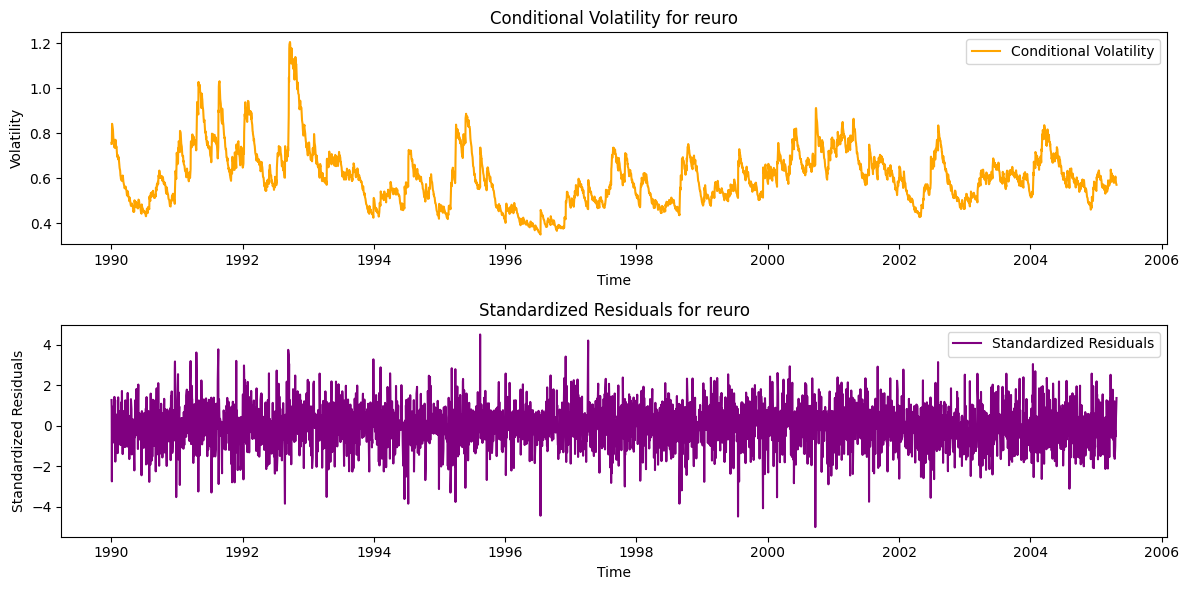

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


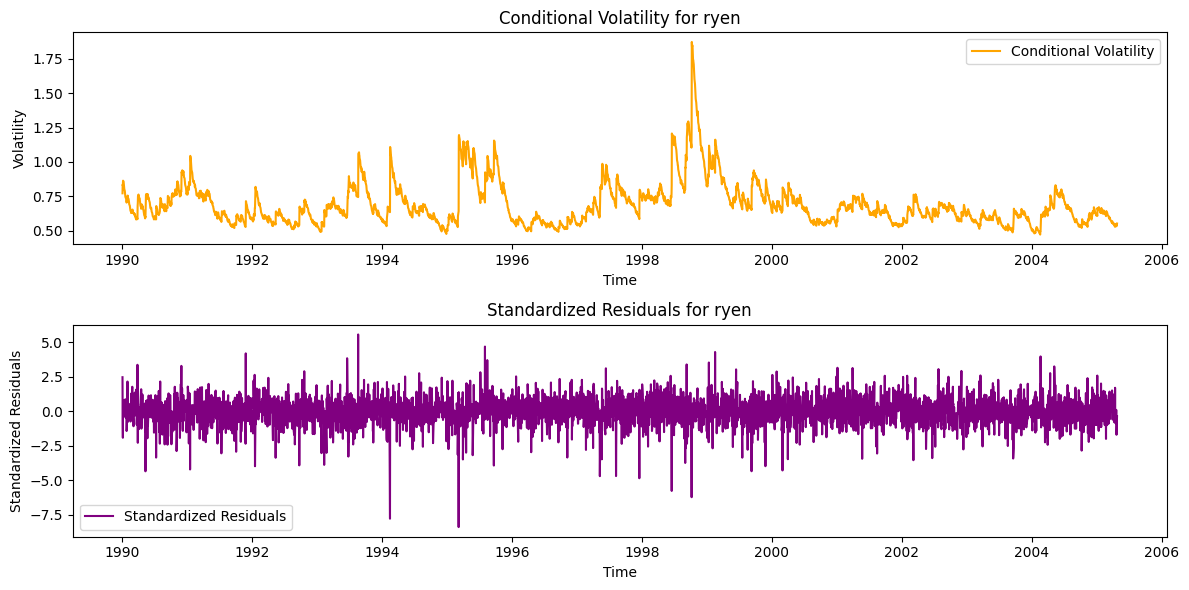

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


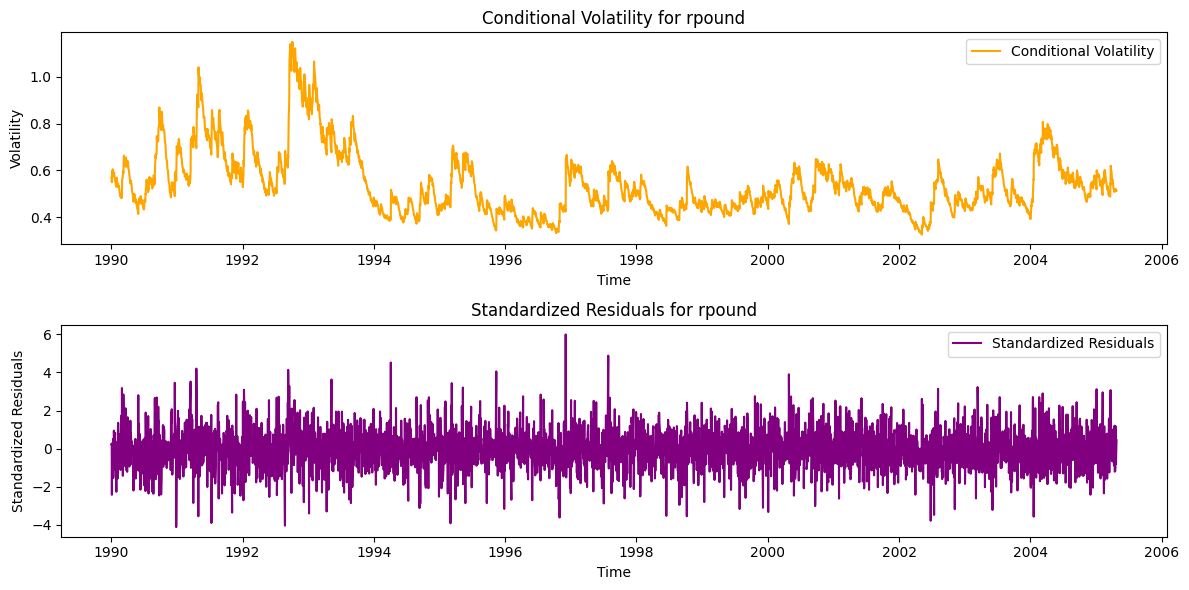

In [13]:
# import necessary packages; I'll be using the arch package's arch_model which includes ML estimation
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model

# Define and rescale data series (I was getting a warning about the scaling of the series previously)
currency_series_scaled = df[['reuro', 'ryen', 'rpound']] * 100

# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit GARCH(1,1) model using those residuals
    model = arch_model(residuals, vol='Garch', p=1, q=1)  # GARCH(1,1) model
    result = model.fit(disp=0) # suppressing the output of iterations; to see them, remove disp=0 --> model.fit() 

    # conditional volatility plot
    conditional_volatility = result.conditional_volatility

    # standardized residuals plot
    standardized_residuals = residuals / conditional_volatility

    # Conditional volatility graph
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    plt.plot(conditional_volatility, label="Conditional Volatility", color='orange')
    plt.title(f"Conditional Volatility for {col}")
    plt.xlabel("Time")
    plt.ylabel("Volatility")
    plt.legend()

    # Standardized residuals graph
    plt.subplot(2, 1, 2)
    plt.plot(standardized_residuals, label="Standardized Residuals", color='purple')
    plt.title(f"Standardized Residuals for {col}")
    plt.xlabel("Time")
    plt.ylabel("Standardized Residuals")
    plt.legend()

    # Show plots
    plt.tight_layout()
    plt.show()

In [14]:
# import model packages; I'll be using the arch package's arch_model which includes ML estimation
from statsmodels.tsa.ar_model import AutoReg
from arch import arch_model

# import Jarque Bera test for normality of the series and get skewness and kurtosis for the series
from statsmodels.stats.stattools import jarque_bera

# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit GARCH(1, 1) model using those residuals
    model = arch_model(residuals, vol='Garch', p=1, q=1)  # GARCH(1, 1) model
    result = model.fit(disp=0)

    # Standardized residuals
    conditional_volatility = result.conditional_volatility
    standardized_residuals = residuals / conditional_volatility

    # 1. Ljung-Box Test for autocorrelation in standardized residuals
    lb_test = acorr_ljungbox(standardized_residuals, lags=20)  # Test for up to 10 lags
    print(f"Box-Ljung Test for {col}: \n\t Box-Ljung Stat: {lb_stat:.4f} \n\t Box-Ljung p-value: {lb_pval:.4f} \n")


    # 2. Jarque-Bera Test for normality
    jb_stat, jb_p_value, skewness, kurtosis = jarque_bera(standardized_residuals)
    print(f"Jarque-Bera Test for {col}: \n\t Jarque-Bera Stat: {jb_stat:.4f} \n\t Jarque-Bera p-value: {jb_pval:.4f}")
    
    print("********************************************")


Box-Ljung Test for reuro: 
	 Box-Ljung Stat: 50.4863 
	 Box-Ljung p-value: 0.0001 

Jarque-Bera Test for reuro: 
	 Jarque-Bera Stat: 270.2343 
	 Jarque-Bera p-value: 0.0000
********************************************
Box-Ljung Test for ryen: 
	 Box-Ljung Stat: 50.4863 
	 Box-Ljung p-value: 0.0001 

Jarque-Bera Test for ryen: 
	 Jarque-Bera Stat: 3749.4756 
	 Jarque-Bera p-value: 0.0000
********************************************
Box-Ljung Test for rpound: 
	 Box-Ljung Stat: 50.4863 
	 Box-Ljung p-value: 0.0001 

Jarque-Bera Test for rpound: 
	 Jarque-Bera Stat: 481.4916 
	 Jarque-Bera p-value: 0.0000
********************************************


/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


### Across all currencies, the Box-Ljung test results in a low p-value, leading us to reject the null hypothesis of zero correlation and suggesting serial correlation (not IID). Moreover, the Jarque-Bera test indicates non-Gaussian distribution of the standardized errors (low p-value), as would be expected for these financial time series.

In [15]:
# Loop through the currencies
for i, col in enumerate(currency_series_scaled.columns):
    # Pull out the series, drop any missing values, and set frequency to daily
    series = currency_series_scaled[col].asfreq('D').dropna()
    
    # Fit AR(1) model to get residuals (u_t)
    ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
    residuals = ar_model.resid  # Residuals u_t
    
    # Fit GARCH(1,1) model using those residuals
    model = arch_model(residuals, vol='Garch', p=1, q=1)  # GARCH(1,1) model
    result = model.fit(disp=0)

    # obtain conditional variance
    cond_var = result.conditional_volatility

    # create a steps variable for the loop
    steps = 4

    # store forecast results
    forecasts = result.forecast(start=result.nobs - 1, horizon=steps) # we will need T-1 observations

    # pull variance forecasts
    cond_var_forecasts = forecasts.variance.iloc[-1]  # Get last row for end of sample
    print(f"Conditional variance forecasts for {col}:")

    # loop for each step's forecast
    for s in range(steps): # from 0 to 3 since steps' value (4) is excluded
        print(f"{s+1}-step ahead forecasted conditional variance: {cond_var_forecasts[s]:.6f}")

    print("\n")

/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)


Conditional variance forecasts for reuro:
1-step ahead forecasted conditional variance: 0.338027
2-step ahead forecasted conditional variance: 0.338521
3-step ahead forecasted conditional variance: 0.339011
4-step ahead forecasted conditional variance: 0.339495




/var/folders/gc/s0xv0zy917nfx03_ndbkjb6m0000gn/T/ipykernel_50366/1850138967.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{s+1}-step ahead forecasted conditional variance: {cond_var_forecasts[s]:.6f}")
/Users/camerontaheri/python/venv_finmet/lib/python3.13/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency B will be used.
  self._init_dates(dates, freq)
/var/folders/gc/s0xv0zy917nfx03_ndbkjb6m0000gn/T/ipykernel_50366/1850138967.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{s+1}-step ahead forecasted conditional

Conditional variance forecasts for ryen:
1-step ahead forecasted conditional variance: 0.299049
2-step ahead forecasted conditional variance: 0.301835
3-step ahead forecasted conditional variance: 0.304583
4-step ahead forecasted conditional variance: 0.307293


Conditional variance forecasts for rpound:
1-step ahead forecasted conditional variance: 0.256455
2-step ahead forecasted conditional variance: 0.256963
3-step ahead forecasted conditional variance: 0.257466
4-step ahead forecasted conditional variance: 0.257964




/var/folders/gc/s0xv0zy917nfx03_ndbkjb6m0000gn/T/ipykernel_50366/1850138967.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"{s+1}-step ahead forecasted conditional variance: {cond_var_forecasts[s]:.6f}")


# Exercise 6: GARCH and VaR - US and UK Bond and Stock Indexes

In [16]:
# import data from UK_US_bond_stock.xlsx and read the first row
df = pd.read_excel("/Users/camerontaheri/python/financial_econometrics_ps/Data/UK_US_bond_stock.xlsx", engine="openpyxl")
df.head()

,_date_,rjpmuk,rjpmus,rmsciuk,rmscius
0,1990-01-01,0.000000,0.000000,0.000000,-0.000003
1,1990-01-02,-0.003479,-0.000694,0.004947,0.017699
2,1990-01-03,-0.001934,-0.002085,0.012267,-0.002167
3,1990-01-04,0.010526,0.000436,0.008019,-0.008148
4,1990-01-05,0.003306,-0.000628,0.001478,-0.009947


Results for r_portfolio:
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                         None   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -3075.34
Distribution:      Standardized Student's t   AIC:                           6160.67
Method:                  Maximum Likelihood   BIC:                           6192.14
                                              No. Observations:                 3995
Date:                      Thu, Apr 10 2025   Df Residuals:                     3994
Time:                              17:22:26   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------

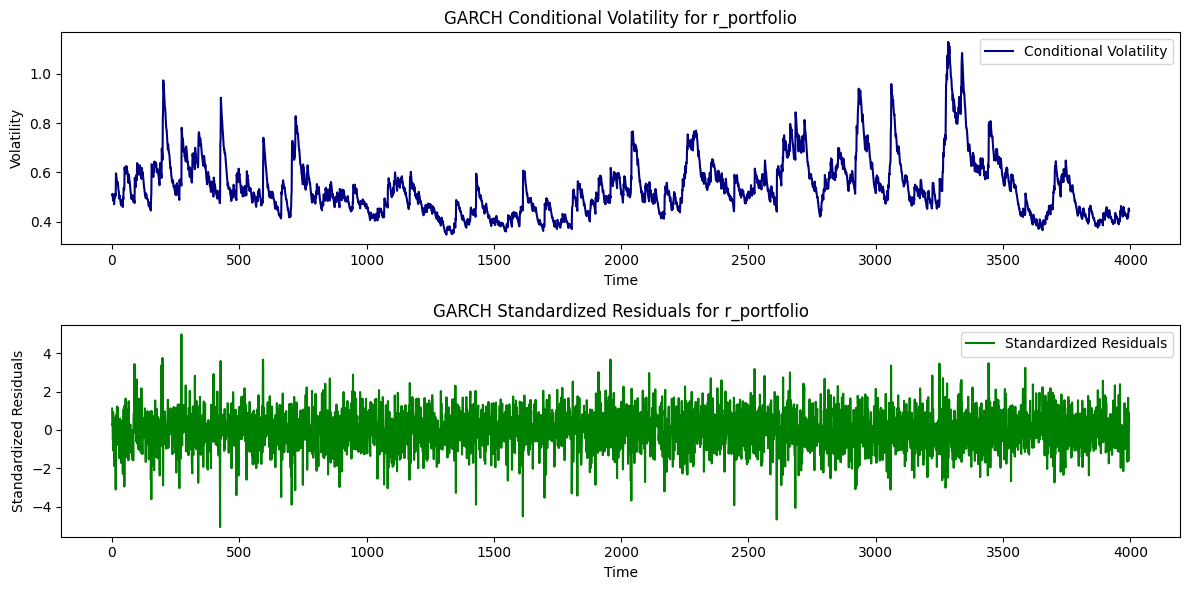

VaR and Expected Shortfall Results: 
 --------------------------
1-day ahead 1% VaR: -1.022968
2-day ahead 1% VaR: -1.026884
1-day ahead 1% Expected Shortfall: 1.172371
2-day ahead 1% Expected Shortfall: 1.176857


In [17]:
# Suppose weights on bond indexes sum to 60% and the US and UK indexes 
# are equally weighted in a portfolio of US and UK bond and stock indexes
#   Bonds = 60% (30% US / 30% UK)
#   Stocks = 40% (20% US / 20% UK)

# Obtain a series of the returns of this portfolio and fit an appropriate GARCH model to 
# provide a 1% VaR measures for the 1, 2 day ahead conditional distributions

# create a variable for the weights
weights = [0.2, 0.2, 0.3, 0.3]

# create a portfolio return variable in the dataframe that calculates the weighted average daily return
df['r_portfolio'] = (
        weights[0] * df['rjpmuk'] +
        weights[1] * df['rjpmus'] +
        weights[2] * df['rmsciuk'] +
        weights[3] * df['rmscius']
)

# show the first few lines to check
df[['r_portfolio']].head()

# --- estimate a GARCH(1,1) model ---

# define returns and scale them
series = df['r_portfolio'].dropna() * 100
series_name = df['r_portfolio'].name

# Fit AR(1) model to get residuals (u_t)
ar_model = AutoReg(series, lags=1, trend="c").fit()  # AR(1) model
residuals = ar_model.resid  # Residuals u_t

# Fit GARCH(1,1) model using those residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1, dist='t')  # GARCH(1,1) model with t-dist to capture large tails
garch_result = garch_model.fit(disp=0) # suppressing the output of iterations; to see them, remove disp=0 --> model.fit() 

# Print results
print(f"Results for {series_name}:")
print(garch_result.summary())

# Get standardized residuals
garch_std_resids = garch_result.resid / garch_result.conditional_volatility

# show test results
print(f"Serial Correlation (BL) and Normality (JB) Test Results: \n ------------------------------------------------")

# Ljung-Box Test for autocorrelation in standardized residuals
lb_test = acorr_ljungbox(garch_std_resids, lags=[20], return_df=True)
print(f"Box-Ljung Test for {series_name}:")
print(f"\t Box-Ljung Stat: {lb_stat:.4f} and p-value: {lb_pval:.4f}")

# Jarque-Bera Test for normality
jb_stat, jb_p_value, skewness, kurtosis = jarque_bera(garch_std_resids)
print(f"Jarque-Bera Test for {series_name}:") 
print(f"\t Jarque-Bera Stat: {jb_stat:.4f} and p-value: {jb_pval:.4f}")

# Conditional volatility graph
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(garch_result.conditional_volatility, label="Conditional Volatility", color='navy')
plt.title(f"GARCH Conditional Volatility for {series_name}")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()

# Standardized residuals graph
plt.subplot(2, 1, 2)
plt.plot(garch_std_resids, label="Standardized Residuals", color='green')
plt.title(f"GARCH Standardized Residuals for {series_name}")
plt.xlabel("Time")
plt.ylabel("Standardized Residuals")
plt.legend()

# Show plots
plt.tight_layout()
plt.show()

# --- obtain VaR for 1 and 2 day ahead conditional variances ---

# get forecasts for 1 and 2 day ahead conditional variances
forecast = garch_result.forecast(horizon=2)

# 1 and 2 day ahead forecasted conditional volatility (std dev)
cond_vol_1_day = forecast.variance.iloc[-1, 0]**0.5
cond_vol_2_day = forecast.variance.iloc[-1, 1]**0.5

# calculate VaR 1% level (alpha=0.01)
# normal dist
z_alpha = norm.ppf(0.01)

# calculate expected value (mean) of return
mean_r_portfolio = np.mean(df['r_portfolio'])

# calculate VaR
VaR_1_day = mean_r_portfolio + z_alpha * cond_vol_1_day
VaR_2_day = mean_r_portfolio + z_alpha * cond_vol_2_day

# Calculate the probability density function (PDF) for z_alpha
pdf_z_alpha = norm.pdf(z_alpha)

# Calculate Expected Shortfall (ES) for 1 and 2 day ahead conditional vol
ES_1_day = mean_r_portfolio + (pdf_z_alpha / 0.01) * cond_vol_1_day
ES_2_day = mean_r_portfolio + (pdf_z_alpha / 0.01) * cond_vol_2_day

# show results
print(f"VaR and Expected Shortfall Results: \n --------------------------")
print(f"1-day ahead 1% VaR: {VaR_1_day:.6f}")
print(f"2-day ahead 1% VaR: {VaR_2_day:.6f}")
print(f"1-day ahead 1% Expected Shortfall: {ES_1_day:.6f}")
print(f"2-day ahead 1% Expected Shortfall: {ES_2_day:.6f}")



### From the GARCH(1,1) model specified above, the ARCH and GARCH coefficients are both statistically significant at the 5% level, suggesting past shocks persist and have an impact on current conditional volatility. The Box-Ljung test indicated serial correlation and the Jarque-Bera test suggests the series of portfolio returns is non-Gaussian.

### My VaR estimates indicate that 1% of the time we will have a returns of -1.023% over the next day and -1.027% over the next 2 days. Given these worst-case scenarios, the expected shortfall shows the average loss if we were to be in either of these cases (in the 1% quantile). Average loss is 1.17% for next day and 1.18% for next 2 days. It is slightly higher than VaR so there can be more severe losses on average if we were to be in the 1% quantile.

# Exercise 7: Backtesting VaR

In [18]:
# For back-testing of VaR I'll use bootstrapping and simulate return paths, calculate VaR and compare them to the above
# parameters for bootstrapping
n_bootstrap = 3000  # Number of bootstrap simulations
alpha = 0.01  # 1% quantile for VaR

# residuals from GARCH model
series = df['r_portfolio'].dropna() * 100
garch_model = arch_model(residuals, vol='Garch', p=1, q=1, dist='t')  # GARCH(1,1) model with t-dist to capture large tails
garch_result = garch_model.fit(disp=0) # suppressing the output of iterations; to see them, remove disp=0 --> model.fit() 
garch_resids = garch_result.resid
garch_cond_vol = garch_result.conditional_volatility

# create lists that can store for the bootstraped returns
bootstrapped_returns_1_day = []
bootstrapped_returns_2_day = []

for i in range(n_bootstrap):
    # random sampling of residuals with replacement of sample of residuals pulled from garch model
    # this originally errored because bootstrap_resids was a larger vector than garch_cond_vol
    # that should be expected since we have one period less of conditional volatilities
    bootstrap_resids = np.random.choice(residuals, size=len(series)-1, replace=True)

    # create bootstrapped returns = mean of returns + resid * cond vol
    bootstrapped_return_1_day = np.mean(series) + bootstrap_resids * garch_cond_vol
    # shift the residuals by a period after confirming in the previous garch estimation that there is serial correlation
    bootstrapped_return_2_day = np.mean(series) + np.roll(bootstrap_resids, shift=-1) * garch_cond_vol

    # add the returns to the lists created above
    bootstrapped_returns_1_day.append(bootstrapped_return_1_day)
    bootstrapped_returns_2_day.append(bootstrapped_return_2_day)

# calculate VaR and Expected Shortfall for each bootstrap path
VaR_1_day_bootstrap = []
VaR_2_day_bootstrap = []
ES_1_day_bootstrap = []
ES_2_day_bootstrap = []

for i in range(n_bootstrap):
    # Calculate 1% quantile (VaR) and Expected Shortfall for each bootstrapped return series
    VaR_1_day_bootstrap.append(np.percentile(bootstrapped_returns_1_day[i], 1))
    VaR_2_day_bootstrap.append(np.percentile(bootstrapped_returns_2_day[i], 1))
    
   # Calculate Expected Shortfall for 1 day forecast
    below_VaR_1_day = [] # store returns that are below the 1-day VaR
    for return_value in bootstrapped_returns_1_day[i]:
        if return_value <= VaR_1_day_bootstrap[i]:
            below_VaR_1_day.append(return_value) # this appends the value if it is below the VaR
    ES_1_day = np.mean(below_VaR_1_day) # expected shortfall treated as mean of the returns below VaR
    ES_1_day_bootstrap.append(ES_1_day) # add the expected shortfall calculated to the list of expected shortfalls
    
    # Calculate Expected Shortfall for 2-day forecast
    below_VaR_2_day = []
    for return_value in bootstrapped_returns_2_day[i]:
        if return_value <= VaR_2_day_bootstrap[i]:
            below_VaR_2_day.append(return_value)
    ES_2_day = np.mean(below_VaR_2_day)
    ES_2_day_bootstrap.append(ES_2_day)

# model performance: compare actual returns with the predicted VaR to see how often it is above VaR

# actual returns
actual_returns_1_day = df['r_portfolio'].iloc[-n_bootstrap:]
actual_returns_2_day = df['r_portfolio'].iloc[-n_bootstrap-1:-1]

# make counters for breaches (below VaR)
breaches_1_day = 0
breaches_2_day = 0

# loop through each bootstrap iteration
for i in range(n_bootstrap):
    # check if the actual returns breach the VaR and add them to the counters if true
    if actual_returns_1_day[i] < VaR_1_day_bootstrap[i]:
        breaches_1_day += 1
    if actual_returns_2_day[i] < VaR_2_day_bootstrap[i]:
        breaches_2_day += 1

# breach rates
breach_rate_1_day = breaches_1_day / n_bootstrap
breach_rate_2_day = breaches_2_day / n_bootstrap

# Step 5: Print and assess results
print(f"Bootstrapped 1-day VaR at 1% level: {np.mean(VaR_1_day_bootstrap)}")
print(f"Bootstrapped 2-day VaR at 1% level: {np.mean(VaR_2_day_bootstrap)}")

print(f"Bootstrapped 1-day Expected Shortfall at 1% level: {np.mean(ES_1_day_bootstrap)}")
print(f"Bootstrapped 2-day Expected Shortfall at 1% level: {np.mean(ES_2_day_bootstrap)}")

print(f"\nBacktest Above VaR Rates (percentage of times actual returns below VaR):")
print(f"1-day below VaR rate: {breach_rate_1_day * 100:.6f}%")
print(f"2-day below VaR rate: {breach_rate_2_day * 100:.6f}%")

KeyError: 0

### This doesn't seem to quite line up with the previous results. I was hoping to obtain a breach rate equal to alpha.